1. Load the dataset into python environment

In [257]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [258]:
data=pd.read_excel('titanic_dataset_28e016c5f7f7209db3febec0c0cc049d.xlsx')

In [259]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803.0,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450.0,8.0500,NaN,S


2. Make ‘PassengerId’ as the index column

In [260]:
data.set_index('PassengerId',inplace=True)

In [261]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803.0,53.1000,C123,S
5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450.0,8.0500,NaN,S


3. Check the basic details of the dataset

In [262]:
#Columns in the dataset
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [263]:
#Check the data shape
data.shape

(891, 11)

In [264]:
#data types
data.dtypes

Survived    float64
Pclass      float64
Name         object
Sex          object
Age         float64
SibSp       float64
Parch       float64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [265]:
#Five number summary
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [266]:
#Null values in data
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

4. Fill in all the missing values present in all the columns in the dataset

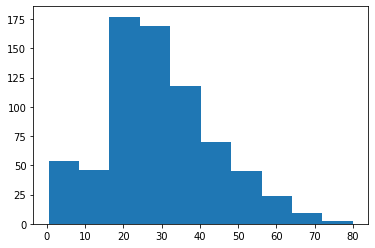

In [267]:
plt.hist(data['Age'])
plt.show()

In [268]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [269]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode)

In [270]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [271]:
data.drop('Cabin',inplace=True,axis=1)

In [272]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset

In [273]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

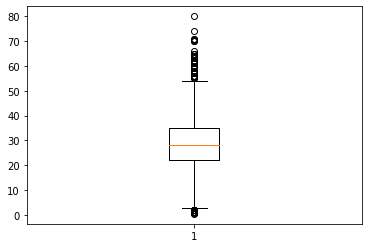

In [274]:
plt.boxplot(data['Age'])
plt.show()

In [275]:
#Find 25 percentile,50 percentile and 75 percentile values
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

22.0 28.0 35.0


In [276]:
data['Age'].median()

28.0

In [277]:
#Interquartile range
IQR=Q3-Q1
IQR

13.0

In [278]:
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit)
print(upper_limit)

2.5
54.5


In [279]:
ind=data[(data['Age']>54.5) | (data['Age']<2.5)].index
ind

Float64Index([  8.0,  12.0,  16.0,  17.0,  34.0,  55.0,  79.0,  95.0,  97.0,
              117.0, 120.0, 153.0, 165.0, 171.0, 173.0, 175.0, 184.0, 196.0,
              206.0, 233.0, 253.0, 269.0, 276.0, 281.0, 298.0, 306.0, 327.0,
              341.0, 367.0, 382.0, 387.0, 439.0, 457.0, 468.0, 470.0, 480.0,
              484.0, 488.0, 493.0, 494.0, 531.0, 546.0, 556.0, 571.0, 588.0,
              626.0, 627.0, 631.0, 643.0, 645.0, 648.0, 660.0, 673.0, 685.0,
              695.0, 746.0, 756.0, 773.0, 789.0, 804.0, 825.0, 828.0, 830.0,
              832.0, 852.0, 880.0],
             dtype='float64', name='PassengerId')

In [280]:
#dropping indexes which have values above and below the limits
data.drop(ind,inplace=True)

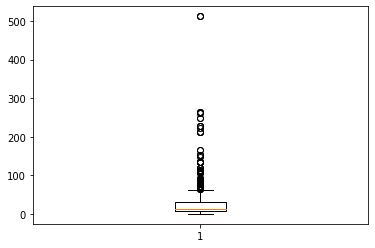

In [281]:
plt.boxplot(data['Fare'])
plt.show()

In [282]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

7.8958 13.4167 30.0708


In [283]:
data['Fare'].median()

13.4167

In [284]:
IQR=Q3-Q1
IQR

22.174999999999997

In [285]:
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit)
print(upper_limit)

-25.366699999999994
63.333299999999994


In [286]:
ind=data[data['Fare']>65.6344].index
ind

Float64Index([  2.0,  28.0,  32.0,  35.0,  53.0,  62.0,  63.0,  73.0,  89.0,
              103.0,
              ...
              780.0, 790.0, 793.0, 803.0, 821.0, 836.0, 847.0, 850.0, 857.0,
              864.0],
             dtype='float64', name='PassengerId', length=104)

In [287]:
data.drop(ind,inplace=True)

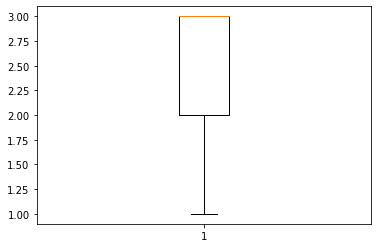

In [288]:
plt.boxplot(data['Pclass'])
plt.show()

In [289]:
#No outliers for Pclass


6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [290]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S
3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S
4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803.0,53.1000,S
5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450.0,8.0500,S
6.0,0.0,3.0,"Moran, Mr. James",male,28.0,0.0,0.0,330877.0,8.4583,Q


In [291]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,0.337032,2.509015,28.094313,0.414702,0.323162,17.389845
std,0.473024,0.717046,10.021961,0.853916,0.788549,13.563036
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,12.275000
75%,1.000000,3.000000,33.000000,1.000000,0.000000,26.000000
max,1.000000,3.000000,54.000000,5.000000,6.000000,65.000000


In [292]:
#Y is the target and X denotes the features
X=data.drop('Survived',axis=1)
Y=data['Survived']

In [293]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S
3.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S
4.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803.0,53.1000,S
5.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450.0,8.0500,S
6.0,3.0,"Moran, Mr. James",male,28.0,0.0,0.0,330877.0,8.4583,Q
...,...,...,...,...,...,...,...,...,...
887.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536.0,13.0000,S
888.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053.0,30.0000,S
889.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1.0,2.0,W./C. 6607,23.4500,S


In [294]:
X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [295]:
Y

PassengerId
1.0      0.0
3.0      1.0
4.0      1.0
5.0      0.0
6.0      0.0
        ... 
887.0    0.0
888.0    1.0
889.0    0.0
890.0    1.0
891.0    0.0
Name: Survived, Length: 721, dtype: float64

In [296]:
#For Scaling we should consider only real numerical values.So dropping categoricaland non numerical values
X=X.drop(['Name', 'Sex','Ticket','Embarked'],axis=1)
X


,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1.0,3.0,22.0,1.0,0.0,7.2500
3.0,3.0,26.0,0.0,0.0,7.9250
4.0,1.0,35.0,1.0,0.0,53.1000
5.0,3.0,35.0,0.0,0.0,8.0500
6.0,3.0,28.0,0.0,0.0,8.4583
...,...,...,...,...,...
887.0,2.0,27.0,0.0,0.0,13.0000
888.0,1.0,19.0,0.0,0.0,30.0000
889.0,3.0,28.0,1.0,2.0,23.4500


In [297]:
#Applying min max scaling
from sklearn import preprocessing
min_max_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
#fitting X
X=min_max_scale.fit_transform(X)

In [298]:
#Converting X back to data frame
X=pd.DataFrame(X,columns=['Pclass',	'Age'	,'SibSp',	'Parch',	'Fare'])

In [299]:
X

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.372549,0.2,0.000000,0.111538
1,1.0,0.450980,0.0,0.000000,0.121923
2,0.0,0.627451,0.2,0.000000,0.816923
3,1.0,0.627451,0.0,0.000000,0.123846
4,1.0,0.490196,0.0,0.000000,0.130128
...,...,...,...,...,...
716,0.5,0.470588,0.0,0.000000,0.200000
717,0.0,0.313725,0.0,0.000000,0.461538
718,1.0,0.490196,0.2,0.333333,0.360769
719,0.0,0.450980,0.0,0.000000,0.461538


In [300]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,721.000000,721.000000,721.000000,721.000000,721.000000
mean,0.754508,0.492045,0.082940,0.053860,0.267536
std,0.358523,0.196509,0.170783,0.131425,0.208662
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.372549,0.000000,0.000000,0.121474
50%,1.000000,0.490196,0.000000,0.000000,0.188846
75%,1.000000,0.588235,0.200000,0.000000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [301]:
#Splitting target and features and storing it to X_train,X_test,Y_train,Y_test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)


In [302]:
#For creating model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
#Fit X_train and Y_train into the model
model=lin_reg.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [303]:
from sklearn.metrics import mean_squared_error,r2_score

In [304]:
#Mean sqaure value should be as low as possible and r squared value should be close to 1
print('The mean square error value is',mean_squared_error(Y_test,predictions))
print('The r squared  value is',r2_score(Y_test,predictions))

The mean square error value is 0.20636498872568865
The r squared  value is 0.0865633920089256
